# 1. Import libraries

In [66]:
# To view dataset shapes
import pandas as pd

# To display multiple tables from one cell
from IPython.display import display

# To visualize missing values
import missingno as msno

# To plot
import plotly.express as px

# 2. Load datasets 
We have two datasets:
* `life_df`: containing original data
* `region_df`: containing country-region couples

In [67]:
# 1. Load datasets
life_df = pd.read_csv("/Users/fangsiyu/Desktop/intro_pj/life_cleaned.csv")
region_df = pd.read_csv("/Users/fangsiyu/Desktop/intro_pj/country_continent.csv")

# 2. Display datasets
display(life_df.head(5))
display(region_df.head(5))

,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,afg,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,75.92,76.07,76.21,76.36,76.50,76.65,76.80,76.95,77.10,77.25
1,ago,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,75.75,75.87,75.99,76.12,76.26,76.39,76.52,76.65,76.79,76.91
2,alb,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,88.93,89.05,89.17,89.28,89.40,89.51,89.62,89.73,89.84,89.95
3,and,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.02,91.14,91.25,91.36,91.47,91.59,91.71,91.82,91.93,92.04
4,are,UAE,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,83.67,83.78,83.90,84.02,84.14,84.24,84.35,84.47,84.58,84.69


,Continent,name
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


# 3. Combine datasets
We perform a LEFT JOIN on the shared `name` column to create a unified dataset for final analysis.

In [68]:
# 1. Merge the two datasets
merged_df = pd.merge(life_df, region_df, on="name", how="left")

# 2. Display merged dataset
merged_df.head(5)

,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,Continent
0,afg,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,76.07,76.21,76.36,76.50,76.65,76.80,76.95,77.10,77.25,Asia
1,ago,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,75.87,75.99,76.12,76.26,76.39,76.52,76.65,76.79,76.91,Africa
2,alb,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,89.05,89.17,89.28,89.40,89.51,89.62,89.73,89.84,89.95,Europe
3,and,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.14,91.25,91.36,91.47,91.59,91.71,91.82,91.93,92.04,Europe
4,are,UAE,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,83.78,83.90,84.02,84.14,84.24,84.35,84.47,84.58,84.69,Asia


We end up with `merged_df`. This is the final dataset we are gonna be working with.

# 4. Transform data

## 4.1 Create *Year* and *Life Expectancy* columns
We create a `Year` and a `Life_Exp` column to make the data easier to plot. </br>

Transformation steps:
1. Identify year columns
2. Tranform them by using `melt`

In [69]:
# 1. Identify year columns
year_cols = [
            col for col in merged_df.columns # loops over every column name
            if col.isdigit() # filter condition
            ]

# 2. Tranform them by using `melt`
long_df = pd.melt(
    merged_df, 
    id_vars=['geo', 'name', 'Continent'],  # keep these columns the same
    value_vars=year_cols, # transform these columns
    var_name='Year', # this column will store the previous column names
    value_name='Life_Exp' # this column will contain the corresponding values
    )

# 3. Display transformed dataset
long_df

,geo,name,Continent,Year,Life_Exp
0,afg,Afghanistan,Asia,1800,28.21
1,ago,Angola,Africa,1800,26.98
2,alb,Albania,Europe,1800,35.40
3,and,Andorra,Europe,1800,NaN
4,are,UAE,Asia,1800,30.70
...,...,...,...,...,...
58389,wsm,Samoa,Oceania,2100,82.27
58390,yem,Yemen,Asia,2100,82.08
58391,zaf,South Africa,Africa,2100,75.24
58392,zmb,Zambia,Africa,2100,74.48


## 4.2 Fix data types
By inspecting the new data frame:

In [58]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58394 entries, 0 to 58393
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   geo        58394 non-null  object 
 1   name       58394 non-null  object 
 2   Continent  52675 non-null  object 
 3   Year       58394 non-null  object 
 4   Life_Exp   56813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


</br>

We notice that the `Year` column is `object` rather than `int` data type.
</br>
That is the case because the `Year` values were column names in the original data set.
</br>
To fix that we change the column data type to `int`.

</br>

In [59]:
long_df['Year'] = long_df['Year'].astype(int)

Display new `Year` column data type:

In [60]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58394 entries, 0 to 58393
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   geo        58394 non-null  object 
 1   name       58394 non-null  object 
 2   Continent  52675 non-null  object 
 3   Year       58394 non-null  int64  
 4   Life_Exp   56813 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ MB


## 4.3 Remove countries w/o continents
There are many countries and islands that are not considered part of continental landmasses. </br>
By using the `missingno` library, we can quickly get an idea of how many of those places our dataset contains.

<Axes: >

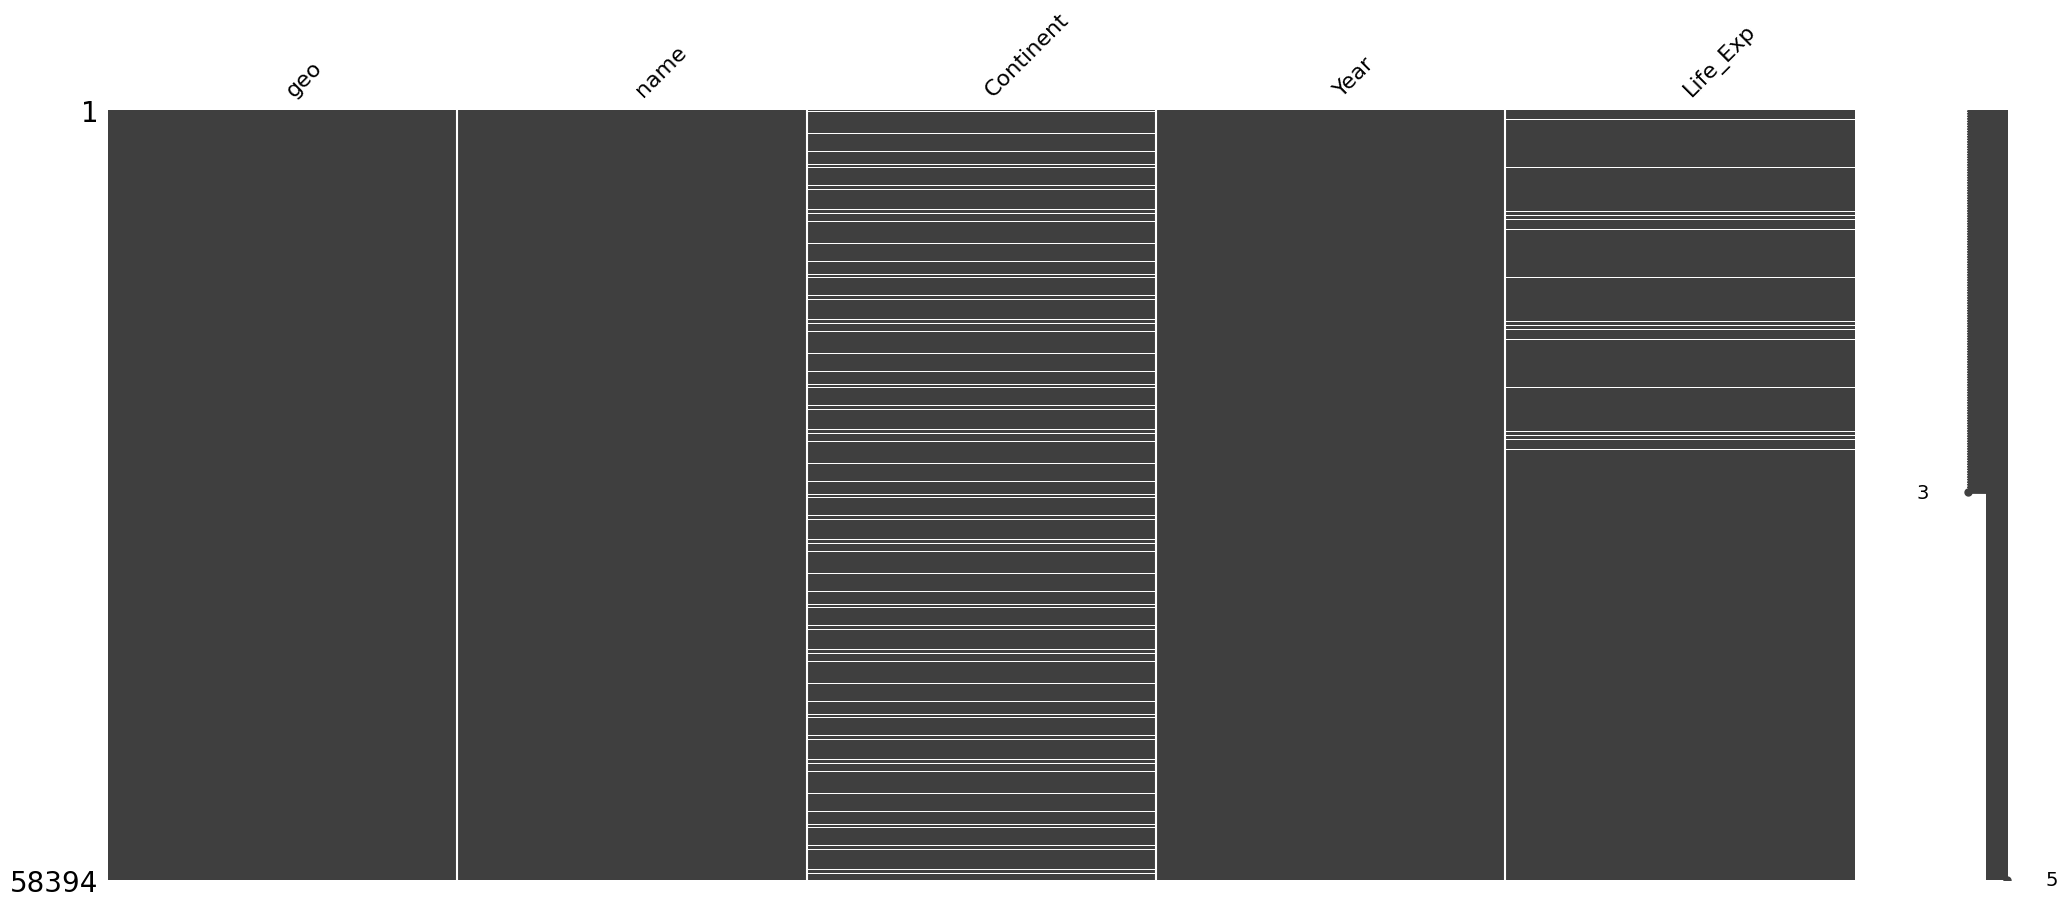

In [61]:
msno.matrix(long_df)

We also notice empty `Life_Exp` rows which we could also remove. </br>
We remove all rows where either the `Continent`  or the `Life_Exp` column has empty values. </br>

In [62]:
long_df = long_df.dropna(subset=['Continent', 'Life_Exp'])

Now our dataset looks complete:

<Axes: >

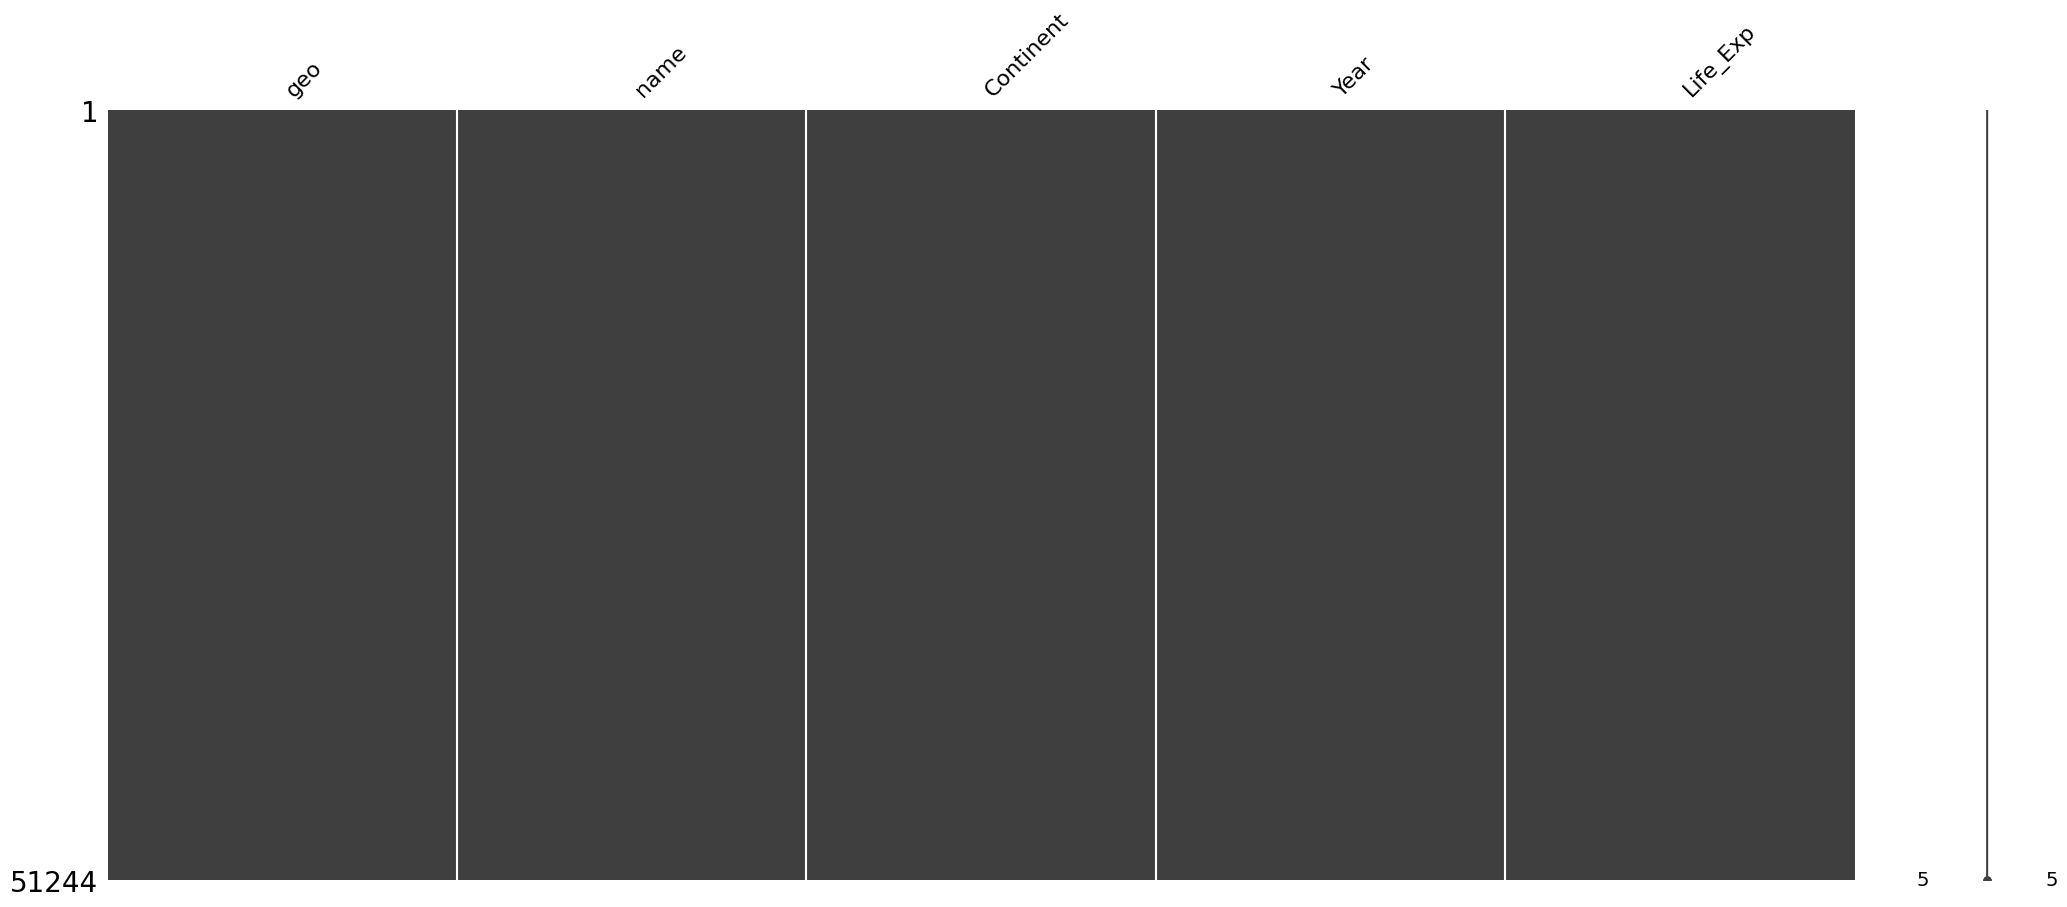

In [63]:
msno.matrix(long_df)

## 4.4 Creating the final dataframe
To plot the data we only need three columns.
* `Life_Exp` for the **y-axis**
* `Year` for the **x-axis**
* `Continent` for the **lines**
  
However, in order to plot the data, we need to have one `Life_Exp` value per `Continent` and `Year`. </br>
In order to do that, we group the countries by their `Continent` and then by the `Year` and calculate the average `Life_Exp`.

In [64]:
# Calculate continent averages per year per Continent
continent_trends = (
    long_df.groupby(['Continent', 'Year'])['Life_Exp'].mean() # Calculate the average life expectancy for each continent-year pair
    .reset_index() # Turns the new data to columns
    .rename(columns={'Life_Exp': 'Avg_Life_Exp'})
)

# Display the dataframe we are going to plot
continent_trends.head()

,Continent,Year,Avg_Life_Exp
0,Africa,1800,30.434898
1,Africa,1801,30.296327
2,Africa,1802,30.296531
3,Africa,1803,30.435510
4,Africa,1804,30.435714


With this new dataframe we can go ahead and plot the data.

# 5. Plotting

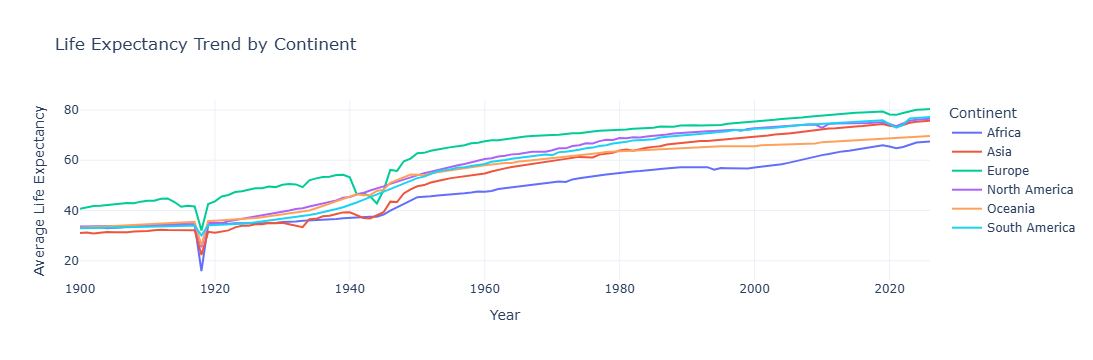

In [65]:
#====================================================#
# Filter for years. Used to focus on the range we want
line_data = continent_trends[
    (continent_trends['Year'] >= 1900) &
    (continent_trends['Year'] <= 2026) ]
#====================================================#


# Create plot
fig = px.line(
    line_data, 
    x="Year", 
    y="Avg_Life_Exp", 
    color="Continent",
    title="Life Expectancy Trend by Continent",
    labels={"Year": "Year", "Avg_Life_Exp": "Average Life Expectancy"},
    template="plotly_white"
)

fig.show()

# 6. Conclusion
Life expectancy is the age at which a person is expected to reach. </br>
Data from that time period is used to make the estimate. In periods of global shocks like wars and pandemics, </br>
deaths skyrocket and have a large effect on the life expectancy calculation.

We immediatly notice distinct points on the plot where large scale historical events have taken place:
* **1914-1920:**
</br>That is the period where The First World War, also known as the Great War took place. It has been estimated that it caused around 40 million casualties.
* **1939-1945:**
</br>The Second World War lasted six years and casualties were extimated between 70 to 85 million people.
* **2002:**
</br>Major global fund to fight AIDS and Malaria aided in delivering treatments to Africa
* **2019-2023:**
</br>Covid-19 wich caused around 7 million deaths

# The End